This notebook focusses on the Translation class of the StochasticProcess module which can be used to translate Gaussian stochastic process to non-Gaussian stochastic process. Firstly, the sample generation code is presented, details of which can be found in 'SRM.ipynb'.

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
T = 100  # Total time
nt = 256  # Num of Discretized Time
dt = T / nt

F = 1 / T * nt / 2  # Frequency.(Hz)
nw = 128  # Num of Discretized Freq.
dw = F / nw
t_u = 2*np.pi/2/F
if dt>t_u:
    print('Error (aliasing)')

# Generation of Input Data(Stationary)
t = np.linspace(0, T - dt, nt)
w = np.linspace(0, F - dw, nw)

# Sample 1000 realizations of the stochastic process
n_sim = 1000

from UQpy.StochasticProcess import SRM
SRM_object = SRM(n_sim, S=S, dw=dw, nt=nt, nw=nw, case='uni')
samples = SRM_object.samples

Next, we import the Translation class from the Stochastic Process module of UQpy software

In [14]:
from UQpy.StochasticProcess import Translation

After that, We initalise a Translation object to translate the gaussian samples generated above to lognormal samples.

In [15]:
Translate_object = Translation('lognormal', [0.5, 0, np.exp(0.5)], dt, dw, nt, nw, S_g=S, samples_g=samples)
samples_ng = Translate_object.samples_ng
samples_ng = samples_ng - np.mean(samples_ng)
R_ng = Translate_object.R_ng
S_ng = Translate_object.S_ng
r_ng = Translate_object.r_ng

(1000, 256)


Finally, Various attributes of the Translation class namely the non-Gaussian Power Spectrum and non-Gaussian time histories are plotted

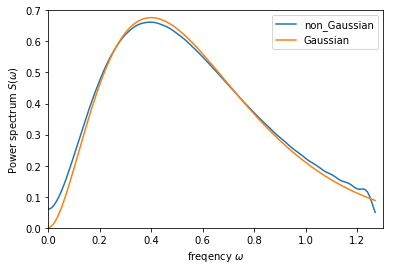

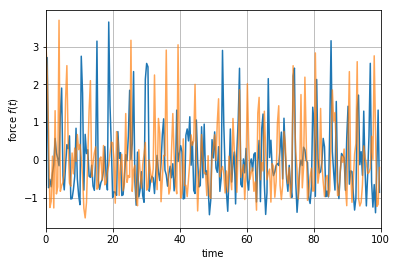

In [16]:
fig7 = plt.figure()
plt.plot(w, S_ng, label='non_Gaussian')
plt.plot(w, S, label='Gaussian')
plt.xlabel('freqency $\omega$')
plt.ylabel('Power spectrum $S(\omega)$')
plt.xlim(0, 1.3)
plt.ylim(0, 0.7)
plt.legend(loc='upper right')
plt.show()

fig8 = plt.figure()
for j in range(2):
    plt.plot(t, samples_ng[j], alpha=1.-j*0.3)
plt.xlim(0, 100)
plt.xlabel('time')
plt.ylabel('force $f(t)$')
plt.grid('on', which='both')
plt.show()